## PCA and t-SNE

In this session we will work on image data of digits and will try to visualise them in two dimensions using the techniques learnt in the LVC - PCA and tSNE.

- We will generate simple scatterplot visualisations for our own implementation and will also look at the function from below link.

- The plot_embedding visualisation snippet has been taken from <a href = "https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py">here</a> - to generate the visualisations discussed in the LVC.


### Data

We will use the sklearn.datasets for this exercise and will only consider 6 classes. Note that the data is loaded as numpy arrays.

### Importing the libraries


In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

# note the way data is loaded. We have used sklearn datasets for this purpose.

In [3]:
# t-SNE embedding of the digits dataset

print("Computing t-SNE embedding")
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
t1 = time()
tsne_time = t1-t0
print("Embeddings in time {}".format(tsne_time),"\n", X_tsne)
print("***************************************************")


# Projection on to the first 2 principal components using truncatedSVD
# TruncatedSVD is just an alternative to PCA that works better with the sparse data and is outside the scope of curriculum.

print("Computing Truncated SVD projection")
t0 = time()
X_svd = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
t1 = time()
svd_time = t1-t0
print("Embeddings in time {}".format(svd_time),"\n", X_svd)
print("***************************************************")


# Projection on to the first 2 principal components using PCA

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
t1 = time()
pca_time = t1-t0
print("Embeddings in time {}".format(pca_time),"\n", X_pca)
print("***************************************************")

Computing t-SNE embedding
Embeddings in time 2.94284987449646 
 [[ 16.14687   -42.780197 ]
 [  6.1760626  36.043736 ]
 [ -7.26177    31.931921 ]
 ...
 [ 39.044537   18.338238 ]
 [ 37.07782    14.362949 ]
 [ 26.177761  -36.468166 ]]
***************************************************
Computing Truncated SVD projection
Embeddings in time 0.0039975643157958984 
 [[45.9419847  10.60661675]
 [55.86822608 -0.32276319]
 [55.34421552  1.90716175]
 ...
 [51.67539905 30.96336624]
 [54.82706599 32.3362925 ]
 [64.03285181 16.65868446]]
***************************************************
Computing PCA projection
Embeddings in time 0.003997325897216797 
 [[ 10.76255849 -24.73806956]
 [ -0.62690579  26.83050007]
 [  1.68579969  12.29145416]
 ...
 [ 30.84986539   6.30638449]
 [ 32.14391391  10.5747751 ]
 [ 16.46964924 -21.36013709]]
***************************************************


In [4]:
# Lets write a function to get the simple scatter plot for the generated embeddings
import seaborn as sns

def scatter(X, title = None):
  x1 = []
  x2 = []
  plt.figure(figsize = (11,11))
  plt.title(title)
  for i in X:
    x1.append(i[0])
    x2.append(i[1])
  sns.scatterplot(x = x1, y = x2)
  plt.show()

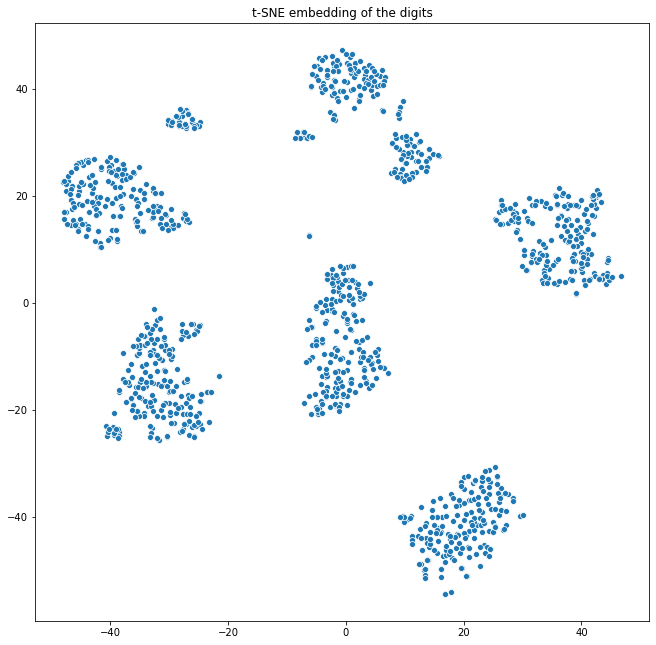

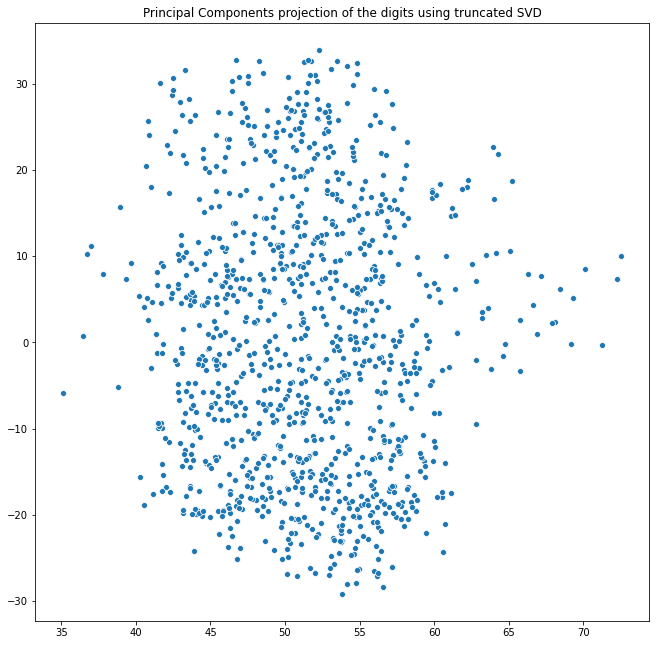

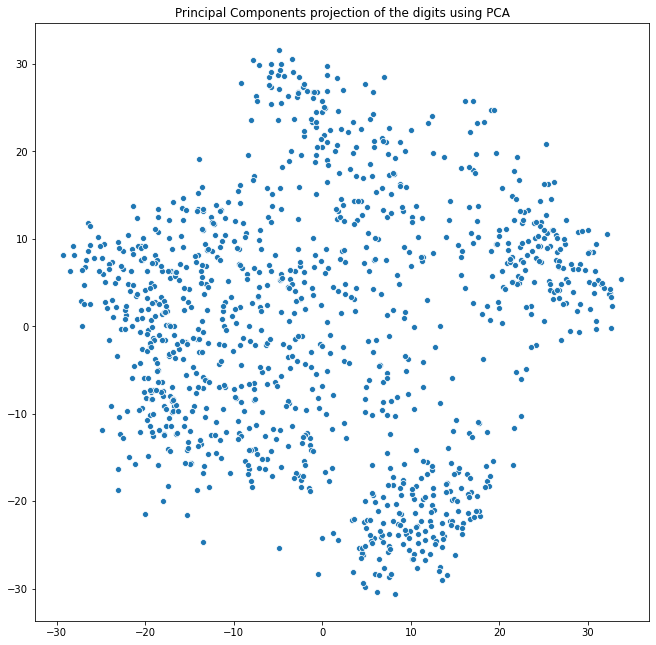

In [5]:
scatter(X_tsne, "t-SNE embedding of the digits")

scatter(X_svd,  "Principal Components projection of the digits using truncated SVD")
               
scatter(X_pca, "Principal Components projection of the digits using PCA")

In [6]:
# Now, let us use the snippet from the above link to get to a more advanced visualisation. It is okay if you do not understand it fully. Just try to go through it.
# Note that the clusters would still appear the same but will be more informative


# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):               # Passing the embedded array and the title of the graph
    print(X)                                        
    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1  

    plt.figure(figsize = (12,12))               # Set the figure size to a sufficiently large value             
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()


[[ 16.14687   -42.780197 ]
 [  6.1760626  36.043736 ]
 [ -7.26177    31.931921 ]
 ...
 [ 39.044537   18.338238 ]
 [ 37.07782    14.362949 ]
 [ 26.177761  -36.468166 ]]


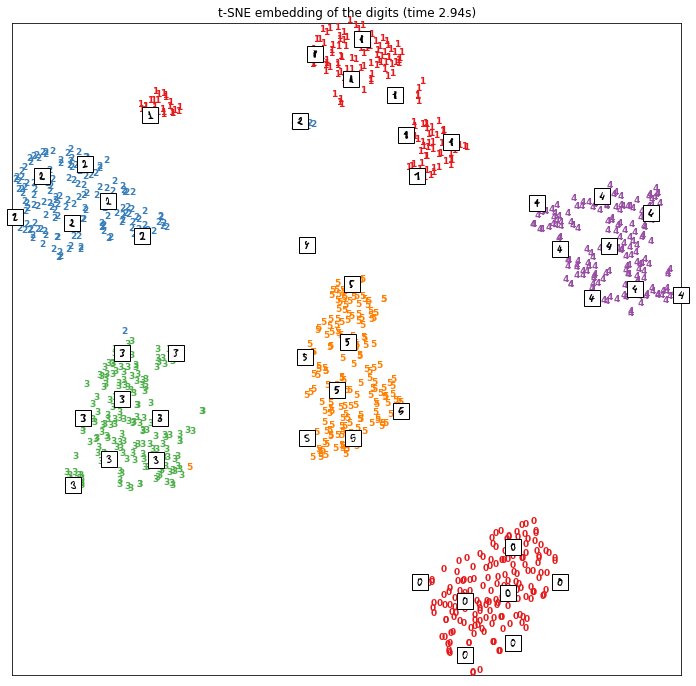

[[45.9419847  10.60661675]
 [55.86822608 -0.32276319]
 [55.34421552  1.90716175]
 ...
 [51.67539905 30.96336624]
 [54.82706599 32.3362925 ]
 [64.03285181 16.65868446]]


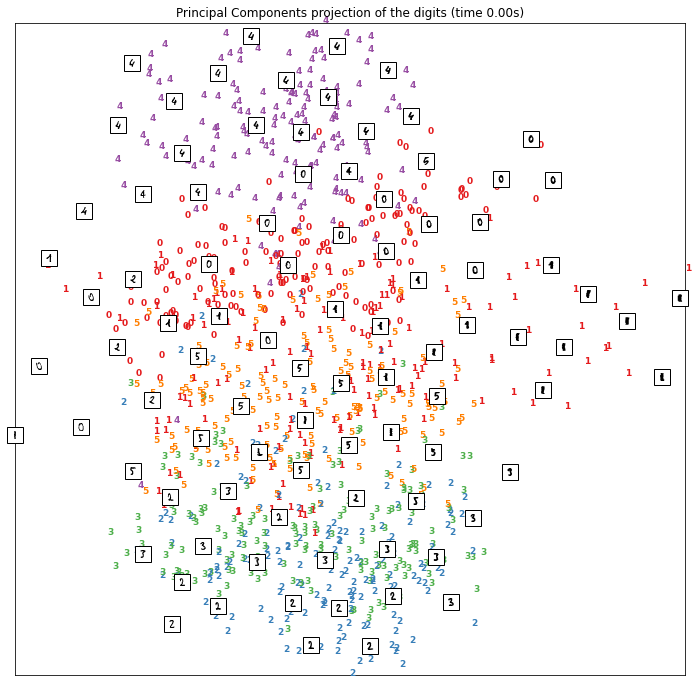

[[ 10.76255849 -24.73806956]
 [ -0.62690579  26.83050007]
 [  1.68579969  12.29145416]
 ...
 [ 30.84986539   6.30638449]
 [ 32.14391391  10.5747751 ]
 [ 16.46964924 -21.36013709]]


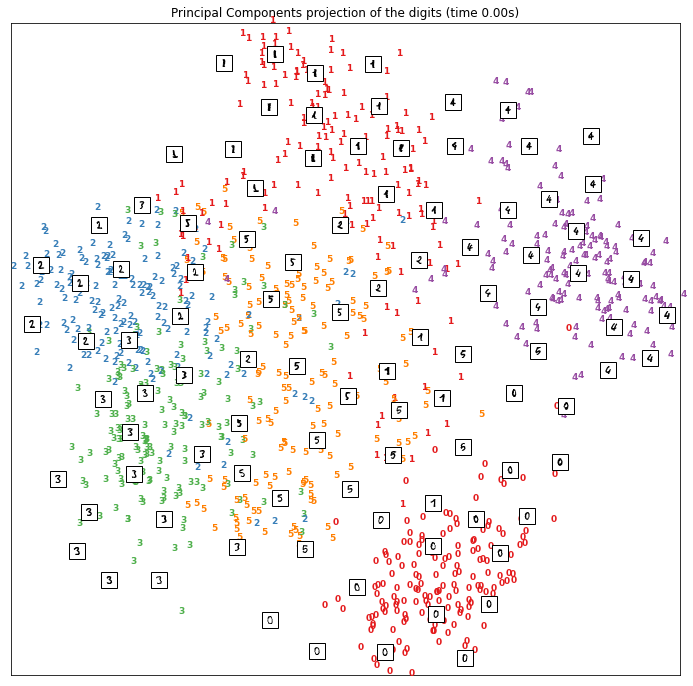

In [7]:
# plotting tsne embeddings 
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

# plotting tsne embeddings
plot_embedding(X_svd,
               "Principal Components projection of the digits (time %.2fs)" %
               (svd_time))

# plotting tsne embeddings
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

### Conclusion:
We reduced the dimensions to two and plotted the 2D embeddings. 

#### Notes
- t-SNE takes most time in the three embeddings we have tried.
- t-SNE based visualisation is the best visualisation out of the three we have used.
- PCA and truncatedSVD have been used too. The embeddings are very quickly calculated but the visualisations are not as good as t-SNE